# 어린 왕자

빅데이터 분석 기법이 많이 사용되는 있는 분야는 텍스트 분석 또는 텍스트 마이닝(Text Mining)이다.  텍스트 마이닝은 문자로 구성된 빅데이터에서 의미있는 결과를 찾아내는 분석 기법으로 다양한 사회연결망에서 생산되는 비정형 자료를 이용하여 다양한 분석을 시도하고 있다. 

이제 두 번째로 파이썬 언어의 데이터 처리를 보여주는 예제로서 유명한 생떽쥐베리의 소설 **어린 왕자**의 한글 텍스트 화일을 이용할 것이다. 소설의 내용으로 이루어진 텍스트 화일에서 문자열을 읽어 데이터프레임으로 전환하여 장(chapter)별로 문자열 `어린 왕자` 가 나타나는 빈도수를 계산할 것이다..

## 라이브러리 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
#import seaborn as sns
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [5]:
import numpy as np
import pandas as pd

# 텍스트 화일 읽기

In [6]:
with open('../../data/little-prince.txt') as f:
    huck_finn_text = f.read()

In [7]:
huck_finn_text

'   \n   어린 왕자\n   영어동화 (우리말 해석)\n   생텍쥐페리\n   \n   \n   헌사(받치는 글)\n   레옹 베르트에게\n   \n   먼저 이 글을 어린이들이 아닌 어른들에게 바치는 것에 대해 사과할까 한다. 심심한 사과의 말을 전한다. 하지만 이들 어른들은 세상에서 가장 좋은 친구다. 물론 이 발언에 대해서도 심심한 사과의 말을 전하는 바이다. 이들 어른들은 모든 걸 이해할 수 있다, 심지어 어린이들의 책까지. 이런 세 번째로 사과의 말을 전하는 바이다. 이들 어른들은 프랑스에만 해도 굶 주림과 추위에 살고 있다. 그에겐 아늑함이 필요한 것도 사실이다. 내 사과들이 충분하든 아니든, 난 이 책을 어른이 된 어린이들에게 바치는 바이다. 모든 어른도 출발은 아이들이었다. 하지만 그들 몇몇만 그걸 기억해낼 뿐이다. 그래 내 헌사(받 치는 글)를 다음과 같이 수정할까 한다.\n   어린이였을 때의\n   레옹 베르트에게\n   \n   ※ 지금부터는 『어린 왕자』(생텍쥐페리의 동화)를 해석해보겠습니다.\n   \n   이 동화는 아래 링크의 동화를 우리말로 옮긴 것입니다.\n   (번역과정에서 구글 번역기를 이용해 1차로 영어원문으로 만든 다음, 그걸 우리말로 읽을 수 있게 좀 수정하고 다듬은 후, 2차로 우리말로 해석했습니다. 따라서 프랑스어 원문과 다를 수 있습니다. 하지만 성실히 번역했기에 큰 줄거리는 맞다고 생각됩니다. 완전한 해석은 아니라는 점 감안해주시고 읽어주세용~♥ 어린 왕자가 좋아서 해석해본 거예요, 제가 읽으려고요. 그러니 많이 읽어주세요~)\n   \n   『어린 왕자』(호주의 애들레이드대학교의 인터넷도서관 사이트)(프랑스 원문) ▶ https://ebooks.adelaide.edu.au/s/saint- exupery/antoine_de/le-petit-prince/ (검색 일자 : 2017-12-9)\n   \n   \n   \n   Le Petit Prince\n   Le Petit Prince / Antoine de

In [8]:
type(huck_finn_text)

str

In [9]:
np.char.count(huck_finn_text, '별')

array(159)

## 데이터프레임 생성

In [10]:
huck_finn_chapters = huck_finn_text.split('어린 왕자\n')

In [11]:
huck_finn_chapters

['   \n   ',
 '   영어동화 (우리말 해석)\n   생텍쥐페리\n   \n   \n   헌사(받치는 글)\n   레옹 베르트에게\n   \n   먼저 이 글을 어린이들이 아닌 어른들에게 바치는 것에 대해 사과할까 한다. 심심한 사과의 말을 전한다. 하지만 이들 어른들은 세상에서 가장 좋은 친구다. 물론 이 발언에 대해서도 심심한 사과의 말을 전하는 바이다. 이들 어른들은 모든 걸 이해할 수 있다, 심지어 어린이들의 책까지. 이런 세 번째로 사과의 말을 전하는 바이다. 이들 어른들은 프랑스에만 해도 굶 주림과 추위에 살고 있다. 그에겐 아늑함이 필요한 것도 사실이다. 내 사과들이 충분하든 아니든, 난 이 책을 어른이 된 어린이들에게 바치는 바이다. 모든 어른도 출발은 아이들이었다. 하지만 그들 몇몇만 그걸 기억해낼 뿐이다. 그래 내 헌사(받 치는 글)를 다음과 같이 수정할까 한다.\n   어린이였을 때의\n   레옹 베르트에게\n   \n   ※ 지금부터는 『어린 왕자』(생텍쥐페리의 동화)를 해석해보겠습니다.\n   \n   이 동화는 아래 링크의 동화를 우리말로 옮긴 것입니다.\n   (번역과정에서 구글 번역기를 이용해 1차로 영어원문으로 만든 다음, 그걸 우리말로 읽을 수 있게 좀 수정하고 다듬은 후, 2차로 우리말로 해석했습니다. 따라서 프랑스어 원문과 다를 수 있습니다. 하지만 성실히 번역했기에 큰 줄거리는 맞다고 생각됩니다. 완전한 해석은 아니라는 점 감안해주시고 읽어주세용~♥ 어린 왕자가 좋아서 해석해본 거예요, 제가 읽으려고요. 그러니 많이 읽어주세요~)\n   \n   『어린 왕자』(호주의 애들레이드대학교의 인터넷도서관 사이트)(프랑스 원문) ▶ https://ebooks.adelaide.edu.au/s/saint- exupery/antoine_de/le-petit-prince/ (검색 일자 : 2017-12-9)\n   \n   \n   \n   Le Petit Prince\n   Le Petit Prince / Antoine de 

In [12]:
a = pd.DataFrame(huck_finn_chapters)

In [13]:
a

,0
0,\n
1,영어동화 (우리말 해석)\n 생텍쥐페리\n \n \n 헌사(받치...
2,\n 물론 내 그림은 실제 모습보단 덜해. 그렇다고 내 실수는 아니라고. ...
3,"4장\n \n 난 곧 아주 중요한 두 번째 사실도 알게 됐는데, 그건 ..."
4,5장\n \n 난 매일 그 별과 떠나온 이유와 여행에 대해 알게 되었어...
5,"6장\n \n 아! 어린 왕자여, 난 이제야 알겠어, 조금씩, 네 어리..."
6,"7장\n \n 다섯 째 날에도, 항상 양 덕분에, 어린 왕자의 비밀을 ..."
7,8장\n \n 나는 곧 이 꽃에 대해 알게 되었다. 어린 왕자의 별엔 ...
8,"9장\n 내 생각에, 어린 왕자는, 철새들이 이동할 때 함께 그 별 을 떠..."
9,"10장\n 어린 왕자의 별 가까이에 소행성 325호, 326호, 327호,..."


In [14]:
b = a.rename({0:'chapter'}, axis='columns')

In [15]:
b

,chapter
0,\n
1,영어동화 (우리말 해석)\n 생텍쥐페리\n \n \n 헌사(받치...
2,\n 물론 내 그림은 실제 모습보단 덜해. 그렇다고 내 실수는 아니라고. ...
3,"4장\n \n 난 곧 아주 중요한 두 번째 사실도 알게 됐는데, 그건 ..."
4,5장\n \n 난 매일 그 별과 떠나온 이유와 여행에 대해 알게 되었어...
5,"6장\n \n 아! 어린 왕자여, 난 이제야 알겠어, 조금씩, 네 어리..."
6,"7장\n \n 다섯 째 날에도, 항상 양 덕분에, 어린 왕자의 비밀을 ..."
7,8장\n \n 나는 곧 이 꽃에 대해 알게 되었다. 어린 왕자의 별엔 ...
8,"9장\n 내 생각에, 어린 왕자는, 철새들이 이동할 때 함께 그 별 을 떠..."
9,"10장\n 어린 왕자의 별 가까이에 소행성 325호, 326호, 327호,..."


In [16]:
b.dtypes

chapter    object
dtype: object

In [17]:
b.loc[3,'chapter']

'   4장\n   \n   난 곧 아주 중요한 두 번째 사실도 알게 됐는데, 그건 어린 왕자의 별이 집보다 조금밖에 크지 않다는 거예요!\n   사실 놀랄 일도 아니죠. 지구, 목성, 화성, 금성과 같이 제가 이름을 익히 알던 큰 별들 외에도 만원경을 통해 보이지 않 는 수 많은 다른 작은 별들이 존재한다는 건 알고 있었거든요. 그런 작은 별들 중 하나를 발견하게 되면 천문학자들은 숫자를 붙이죠. 예를 들면 이렇게 호명하는 겁니다. "소행성 325"\n   어린 왕자가 온 별이 소행성 B 612라고 제가 믿는 데에는 심각한 이유가 있답니다.\n   \n   어린 왕자의 별, 소행성 B 612\n   \n   이 소행성은 1909년도에 터키의 어느 천문학자가 만원경으로 딱 한 번 본 적이 있데요.\n   \n   \n   만원경\n   그는 자신의 발견에 대해 국제 천문학회에서 어마어마한 시연을 해보였죠. 하지만 그의 옷차림 때문에 아무도 그 말을 믿지 않았데요. 어른들은 늘 그런 식이죠.\n   \n   \n   \n   터키 옷을 착용한, 터키 천문학자\n   \n   운이 좋게도, 소행성 B 612가 알려지게 된 결정적 계기는, 터키의 독재자가 자신의 국민들에게 모두 유럽식으로 옷을 입으라고 명령했기 때문이에요, 안 그럼 사형에 처하겠다고 엄포를 놓았거든요. 그래서 아주 기품 있는 복장을 하고서 1920년에 아까 그 천문학자가 다시 자신의 발견에 대해 시연을 해 보였죠. 그러자 모두가 그의 말을 믿게 되었답니다.\n   유럽식 양복을 착용한, 아까 그 터키 천문학자\n   \n   내가 소행성 B 612를 설명하며 굳이 숫자를 제시한 것은 모두 어른들 때문이다. 어른들은 숫자를 좋아하거든. 내 새 친 구를 소개해드리면 어른들은 이렇게 묻지 않는다. 결코 말이다. "그 애의 목소리는 어떠니? 무슨 놀이를 좋아하니? 나비 수집을 좋아하니?" 대신 어른들은 이렇게 묻을 것이다. "그 애 몇 살이니? 형제는 몇 명이라니? 몸무게는 얼마라니? 그 애 아빠 수입은 

## 문자열 빈도 계산

In [18]:
counts = b.applymap(lambda x: np.char.count(x, "어린 왕자"))

In [19]:
counts

,chapter
0,0
1,5
2,6
3,7
4,10
5,2
6,5
7,14
8,8
9,24


<AxesSubplot:>

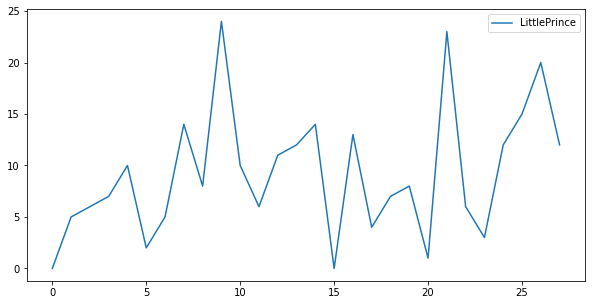

In [20]:
counts.rename({'chapter':'LittlePrince'}, axis='columns').plot()